## My question

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Datasets/comp_links.csv')
df.head(2)

,NOMBRE,LINK,2020,2019,EXPEDIENTE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,...,SECTOR,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020
0,CORPORACION FAVORITA C.A.,https://ec.linkedin.com/company/corporacionfav...,1.0,1,384.0,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,...,MERCADO DE VALORES,10768.0,2.121860e+09,1.482973e+09,2.170603e+09,187168402.3,2.201981e+08,1.474992e+08,41971212.00,2.170603e+09
1,ECUACORRIENTE,https://www.linkedin.com/company/ecuacorriente...,2.0,4,6796.0,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,...,SOCIETARIO,966.0,1.607423e+09,5.689866e+08,0.000000e+00,-1387158.7,0.000000e+00,-2.633856e+06,1246697.02,0.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NOMBRE                      100 non-null    object 
 1   LINK                        100 non-null    object 
 2   2020                        100 non-null    float64
 3   2019                        100 non-null    object 
 4   EXPEDIENTE                  100 non-null    float64
 5   TIPO COMPAÑIA               100 non-null    object 
 6   ACTIVIDAD ECONÓMICA         100 non-null    object 
 7   REGION                      100 non-null    object 
 8   PROVINCIA                   100 non-null    object 
 9   CIUDAD                      100 non-null    object 
 10  TAMAÑO                      100 non-null    object 
 11  SECTOR                      100 non-null    object 
 12  CANT. EMPLEADOS             99 non-null     float64
 13  ACTIVO2020                  100 non-

## Processing

In [5]:
# Calculate ROA (Return on Assets)
def calculate_ROA(row):
  net_profits = row["UTILIDAD NETA2020"]
  total_assets = row.ACTIVO2020
  return ((net_profits/total_assets) * 100)
  


#test= df[["UTILIDAD NETA2020", "ACTIVO2020"]].apply(calculate_ROA, axis=1)
df['ROA'] = df[["UTILIDAD NETA2020", "ACTIVO2020"]].apply(calculate_ROA, axis=1)
#test
df[["NOMBRE", "ROA"]].head(10)

,NOMBRE,ROA
0,CORPORACION FAVORITA C.A.,6.951411
1,ECUACORRIENTE,-0.163856
2,AURELIAN ECUADOR,-3.087969
3,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES CO...,8.772698
4,CORPORACION QUIPORT,-3.323227
5,CORPORACION EL ROSADO,3.663400
6,HIDALGO E HIDALGO,3.520079
7,OTECEL,-2.313952
8,PROCESADORA NACIONAL DE ALIMENTOS C.A. PRONACA,3.620939
9,INDUSTRIAL PESQUERA SANTA PRISCILA,4.808221


In [6]:
df_uni = pd.read_csv('Datasets/clean_where_they_studied.csv')
df_uni = df_uni[["NOMBRE", "Escuela Superior Politécnica del Litoral"]]
df_uni

,NOMBRE,Escuela Superior Politécnica del Litoral
0,CORPORACION FAVORITA C.A.,14.0
1,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES CO...,86.0
2,CORPORACION EL ROSADO,123.0
3,HIDALGO E HIDALGO,12.0
4,OTECEL,0.0
...,...,...
93,SOCIEDAD AGRICOLA E INDUSTRIAL SAN CARLOS SA,37.0
94,ICESA,0.0
95,INDEUREC,3.0
96,LIMBOMAR,4.0


In [7]:
merged = pd.merge(df, df_uni)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   NOMBRE                                    99 non-null     object 
 1   LINK                                      99 non-null     object 
 2   2020                                      99 non-null     float64
 3   2019                                      99 non-null     object 
 4   EXPEDIENTE                                99 non-null     float64
 5   TIPO COMPAÑIA                             99 non-null     object 
 6   ACTIVIDAD ECONÓMICA                       99 non-null     object 
 7   REGION                                    99 non-null     object 
 8   PROVINCIA                                 99 non-null     object 
 9   CIUDAD                                    99 non-null     object 
 10  TAMAÑO                                  

In [9]:
df = merged.copy()
df.rename(columns={"Escuela Superior Politécnica del Litoral": "ESPOL"}, inplace=True)
df.head(5)

,NOMBRE,LINK,2020,2019,EXPEDIENTE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,...,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020,ROA,ESPOL
0,CORPORACION FAVORITA C.A.,https://ec.linkedin.com/company/corporacionfav...,1.0,1,384.0,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,...,2.121860e+09,1.482973e+09,2.170603e+09,187168402.3,2.201981e+08,1.474992e+08,41971212.00,2.170603e+09,6.951411,14.0
1,ECUACORRIENTE,https://www.linkedin.com/company/ecuacorriente...,2.0,4,6796.0,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,...,1.607423e+09,5.689866e+08,0.000000e+00,-1387158.7,0.000000e+00,-2.633856e+06,1246697.02,0.000000e+00,-0.163856,0.0
2,AURELIAN ECUADOR,https://www.linkedin.com/company/lundin-gold/?...,3.0,3,93144.0,ANÓNIMA,B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...,ORIENTE,ZAMORA CHINCHIPE ...,LOS ENCUENTROS ...,...,1.599727e+09,6.052935e+08,3.587926e+08,-49399080.0,-4.939908e+07,-4.939908e+07,0.00,3.588240e+08,-3.087969,21.0
3,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES CO...,https://ec.linkedin.com/company/conecel?trk=co...,5.0,5,47845.0,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",COSTA,GUAYAS ...,GUAYAQUIL ...,...,1.217718e+09,2.647091e+08,1.066242e+09,174644376.0,2.048239e+08,1.068268e+08,67817626.00,1.071561e+09,8.772698,86.0
4,CORPORACION QUIPORT,https://ec.linkedin.com/company/quiport?trk=co...,7.0,8,93325.0,ANÓNIMA,M7020.04 - PRESTACIÓN DE ASESORAMIENTO Y AYUDA...,SIERRA,PICHINCHA ...,QUITO ...,...,8.140678e+08,2.128526e+08,1.249086e+09,-27053323.0,-2.705332e+07,-2.705332e+07,0.00,8.353065e+07,-3.323227,0.0


## Looking For Correlation

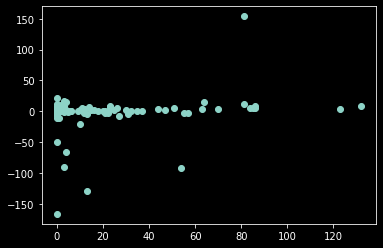

In [10]:
# Let's use a scatter plot and se if there's a pattern/behaviour as the number of ESPOL alumni increases.
plt.plot( 'ESPOL', 'ROA', data=df, linestyle='none', marker='o')
plt.show()

In [11]:
df_corr = df[["ROA", "ESPOL"]].corr()
df_corr.loc["ROA", "ESPOL"]

0.1971714114378395

### Preemptive analysis
There seems to be NO SIGNIFICANT correlation between the number of ESPOL alumni working at a given company (from the top 100) and the company's Return of Assets (ROA). To a degree, this could be expected, since the ROA metric has a lot more to do with internal tangible asset management of the company rather than the productivity or efficiency of their employees, nonetheless, some of the literature suggested this could be an interesting find (check the article for details on the literature).

In [14]:
# Look for correlations between emlployee amount in order to discard possiblity of ESPOL alumni being a very small fraction of a company's resourses
df_corr = df[["ROA", "CANT. EMPLEADOS"]].corr()
df_corr.loc["ROA", "CANT. EMPLEADOS"]

-0.0437177682138472

### Preemptive analysis
We thought that maybe, the reason why no correlation was found between ESPOL alumni and a company's ROA was due to the employees of the company that were also ESPOL alumni might be too small to noticeably influence a multi-encompassing financial metric like the ROA. 

After all, our exploratory analysis shows that top 100 companies in Ecuador hire their employees from a diverse set of universities (check clean_where_they_studied.csv dataframe). 

However, there's no significant correlation between the employee amount of a company and the ROA either, meaning, there is no important correlation between all of the workers of the company regardless of where they studied when it comes to ROA.